# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
arquivo = pd.read_csv('previsao_de_renda.csv', encoding = 'latin1')
df = pd.DataFrame(arquivo)
df = df.drop(columns=['Unnamed: 0','index','mau'])
df['data_ref'] = pd.to_datetime(df['data_ref'])
df.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37


In [3]:
df_quant = df.select_dtypes(include='number')
cor_matrix = df_quant.corr()
df_quant.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98
3,0,50,1.208219,2.0,7246.69
4,0,52,13.873973,2.0,4017.37


In [4]:
cor_matrix.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


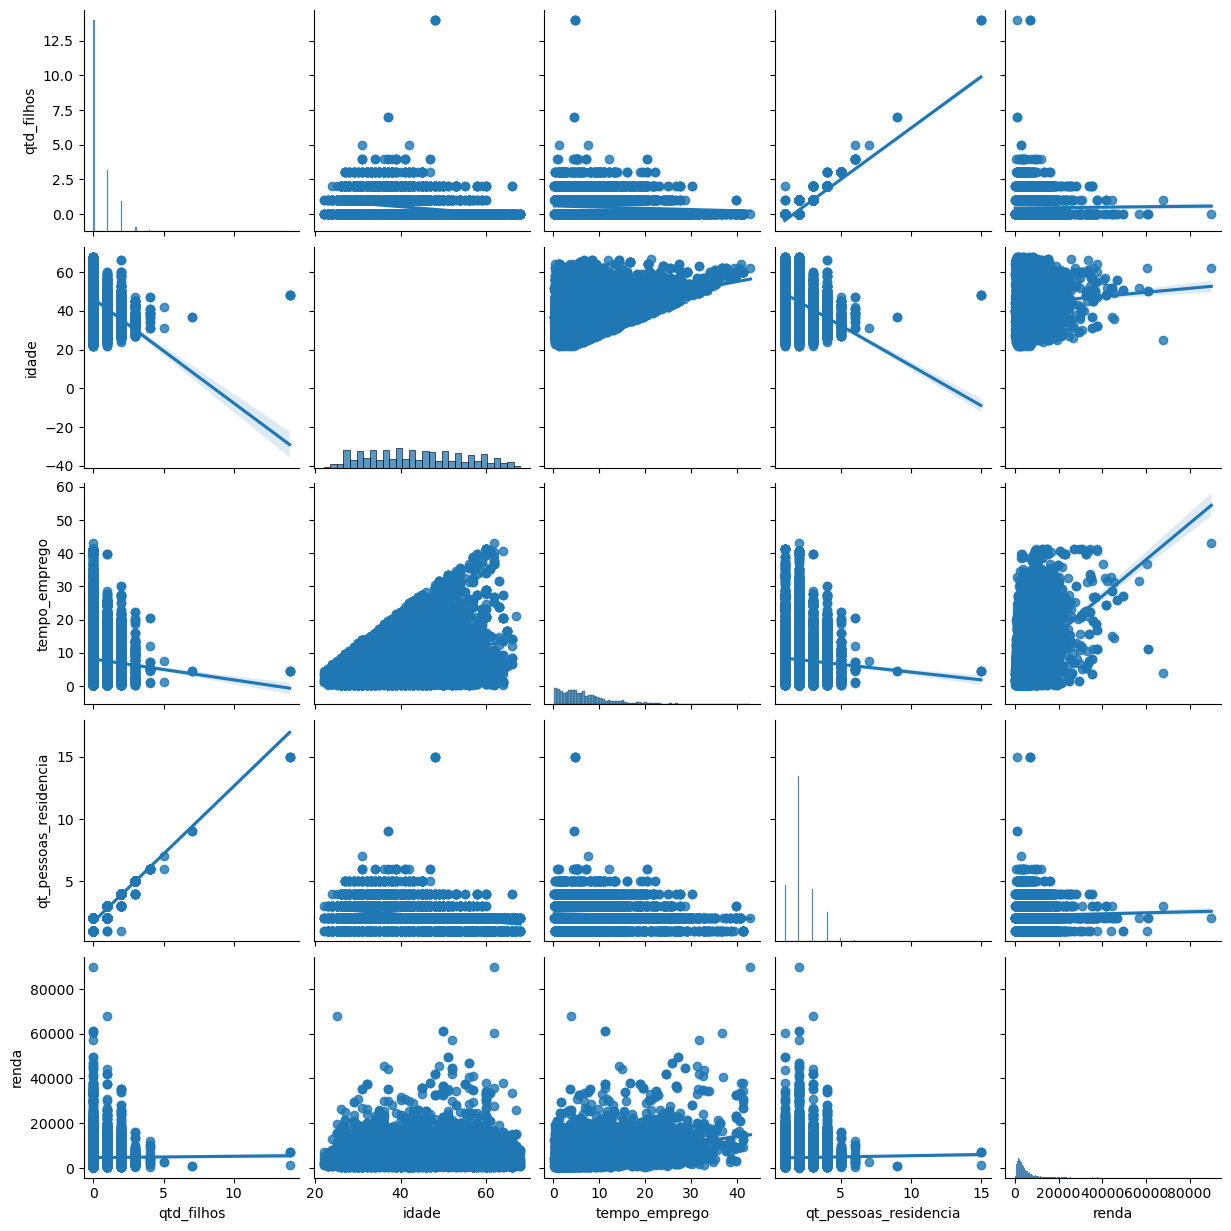

In [5]:
sns.pairplot(df_quant, kind= 'reg')
plt.show()

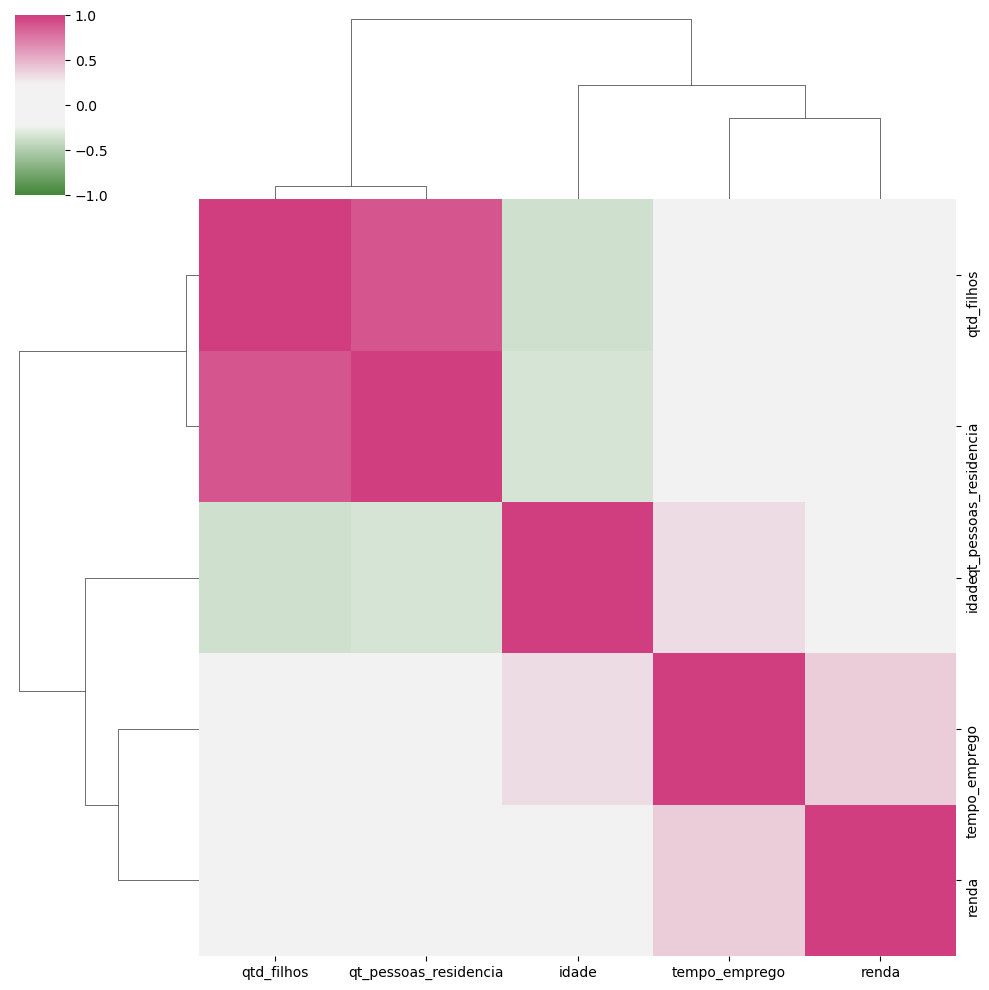

In [6]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(cor_matrix, figsize=(10, 10), center = 0, cmap=cmap, vmin=-1, vmax=1)

**Observei que as variáveis que indicam tempo tendem a possuir correlação negativa com variáveis de quantidade de pesosas na residência, indicando que pessoas mais velhas tendem a ficar mais solitárias.**

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

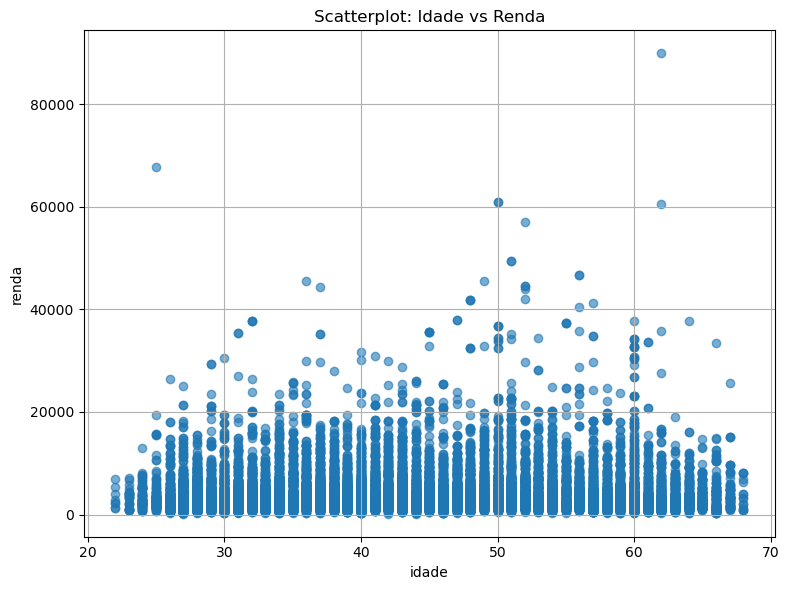

In [7]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_quant['idade'], df_quant['renda'], alpha=0.6)
plt.xlabel('idade')
plt.ylabel('renda')
plt.title('Scatterplot: Idade vs Renda')
plt.grid(True)
plt.tight_layout()
plt.show()

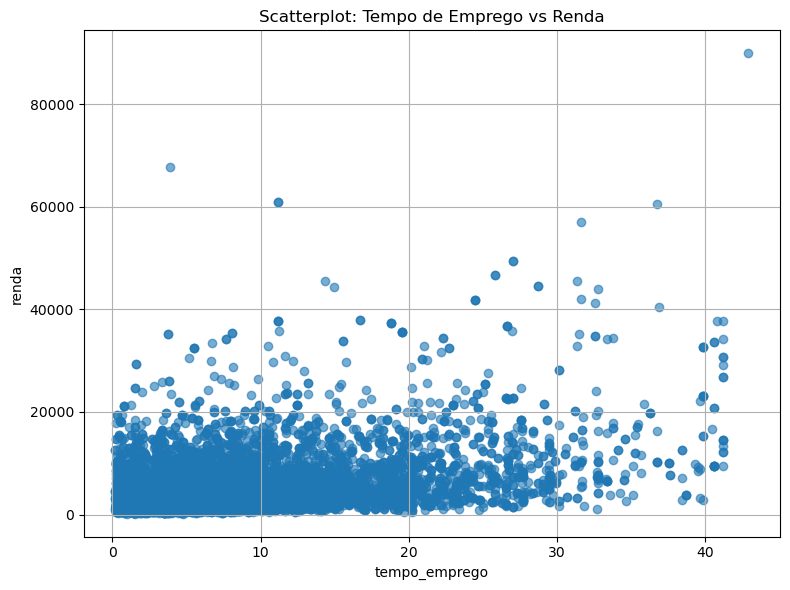

In [8]:
plt.figure(figsize=(8, 6))
scatter_2 = plt.scatter(df_quant['tempo_emprego'], df_quant['renda'], alpha=0.6)
plt.xlabel('tempo_emprego')
plt.ylabel('renda')
plt.title('Scatterplot: Tempo de Emprego vs Renda')
plt.grid(True)
plt.tight_layout()
plt.show()

3) Na sua opinião, há outliers na variável renda?

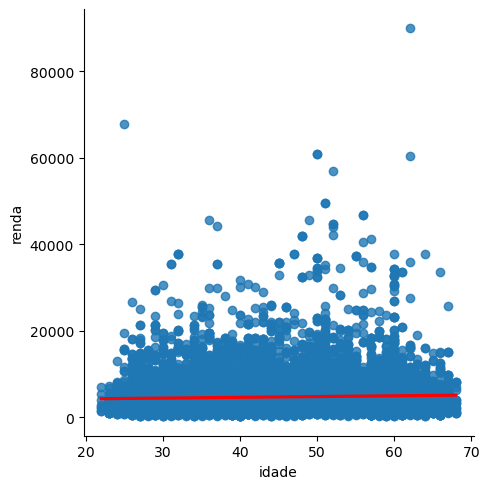

In [9]:
sns.lmplot(x = 'idade', y = 'renda', data = df_quant, line_kws={"color": "red"})

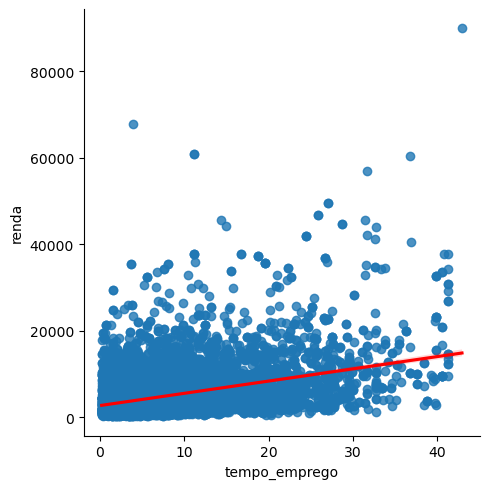

In [10]:
sns.lmplot(x = 'tempo_emprego', y = 'renda', data = df_quant, line_kws={"color": "red"})

Observando ambos os gráficos, podemos observar que os outliers mais visíveis são do eixo y, indicando que a variável renda possui sim outliers.

4) Calcule o logaritmo da variável renda e repita a sequência de análise.

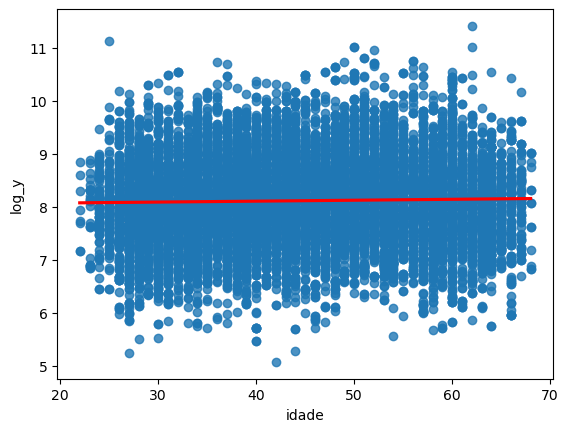

In [15]:
df_quant_log = df_quant.copy()
df_quant_log['log_y'] = np.log(df_quant_log['renda'])

_ = sns.regplot(x='idade', y='log_y',data = df_quant_log, line_kws={"color": "red"})

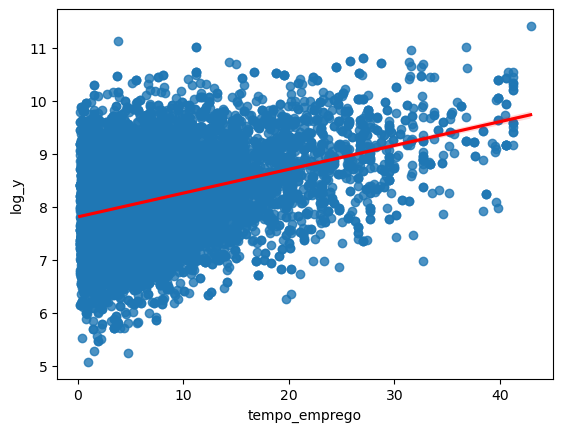

In [16]:
df_quant_log_2 = df_quant.copy()
df_quant_log_2['log_y'] = np.log(df_quant_log_2['renda'])

_ = sns.regplot(x='tempo_emprego', y='log_y',data = df_quant_log_2, line_kws={"color": "red"})

In [14]:
df_quant_log.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_y
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734
log_y,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000


In [13]:
df_quant_log_2.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_y
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734
log_y,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000


5) Você acha que a aplicação do LOG melhorou ou piorou a análise?

Melhorou, pois agora a os valores estão mais centralizados na linha de tendência.